<a href="https://colab.research.google.com/github/amfsunlimited/Machine-Learning-Beginner-/blob/main/K_Nearest_Neighbour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Steps to implement the K-NN algorithm:

Data Pre-processing step.
Fitting the K-NN algorithm to the Training set.
Predicting the test result.
Test accuracy of the result(Creation of Confusion matrix).
Visualizing the test set result.


Data Pre-Processing Step:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mtp


data_set = pd.read_csv('Life_expectancy_dataset.csv',encoding = "ISO-8859-1")
data_set

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe
...,...,...,...,...,...,...
218,219,Gabon,52.1,51.6,52.5,Africa
219,220,Swaziland,51.6,52.2,51.0,Africa
220,221,Afghanistan,51.3,49.9,52.7,Asia
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa


Pre Processing the data since we have a categorical column

In [ ]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(data_set['Continent'])
 
# printing label
label

array([2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 4, 2, 2, 3, 2, 2, 2, 2, 2,
       2, 3, 3, 2, 3, 2, 4, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 3, 3, 3, 4,
       0, 2, 2, 3, 2, 1, 5, 3, 2, 1, 3, 3, 2, 3, 2, 2, 3, 3, 1, 4, 5, 3,
       4, 1, 2, 1, 1, 4, 5, 5, 5, 2, 3, 0, 0, 5, 5, 1, 2, 2, 3, 0, 2, 2,
       4, 0, 2, 2, 3, 4, 5, 5, 3, 1, 0, 1, 1, 2, 4, 3, 3, 1, 4, 2, 1, 1,
       1, 2, 1, 1, 3, 0, 1, 2, 1, 2, 2, 3, 3, 1, 5, 1, 5, 4, 3, 4, 1, 1,
       3, 4, 4, 4, 3, 2, 0, 4, 1, 2, 3, 3, 3, 5, 0, 2, 1, 3, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 5, 1, 3, 1, 5, 1, 1, 1, 4, 4, 1, 0, 4, 4, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0])

In [ ]:
# removing the column 'Continent' from data_set
# as it is of no use now.
data_set.drop("Continent", axis=1, inplace=True)
 
# Appending the array to our dataFrame
# with column name 'Purchased'
data_set["Continent"] = label
 
# printing Dataframe
data_set

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,2
1,2,Japan,85.0,81.7,88.5,1
2,3,Singapore,85.0,82.3,87.8,1
3,4,Macau; China,84.5,81.6,87.6,1
4,5,San Marino,83.3,80.7,86.1,2
...,...,...,...,...,...,...
218,219,Gabon,52.1,51.6,52.5,0
219,220,Swaziland,51.6,52.2,51.0,0
220,221,Afghanistan,51.3,49.9,52.7,1
221,222,Guinea-Bissau,50.6,48.6,52.7,0


In [ ]:

#Extracting Independent and dependent Variable  
x= data_set.iloc[:, [2,3,4]].values  
y= data_set.iloc[:, 5].values  

In [ ]:
y


array([2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 4, 2, 2, 3, 2, 2, 2, 2, 2,
       2, 3, 3, 2, 3, 2, 4, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 3, 3, 3, 4,
       0, 2, 2, 3, 2, 1, 5, 3, 2, 1, 3, 3, 2, 3, 2, 2, 3, 3, 1, 4, 5, 3,
       4, 1, 2, 1, 1, 4, 5, 5, 5, 2, 3, 0, 0, 5, 5, 1, 2, 2, 3, 0, 2, 2,
       4, 0, 2, 2, 3, 4, 5, 5, 3, 1, 0, 1, 1, 2, 4, 3, 3, 1, 4, 2, 1, 1,
       1, 2, 1, 1, 3, 0, 1, 2, 1, 2, 2, 3, 3, 1, 5, 1, 5, 4, 3, 4, 1, 1,
       3, 4, 4, 4, 3, 2, 0, 4, 1, 2, 3, 3, 3, 5, 0, 2, 1, 3, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 5, 1, 3, 1, 5, 1, 1, 1, 4, 4, 1, 0, 4, 4, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0])

Now splitting the data set  into training and test data

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.15, random_state=0)

In [ ]:
y_train


array([2, 2, 3, 2, 3, 1, 1, 3, 2, 4, 0, 2, 3, 0, 0, 0, 1, 0, 0, 3, 1, 1,
       0, 2, 0, 2, 4, 2, 2, 0, 3, 2, 4, 3, 1, 3, 4, 3, 0, 3, 2, 3, 2, 3,
       2, 2, 4, 0, 3, 1, 5, 3, 1, 1, 1, 2, 0, 5, 5, 2, 3, 2, 2, 2, 0, 2,
       3, 2, 1, 0, 1, 1, 1, 0, 1, 2, 2, 0, 4, 1, 4, 5, 0, 0, 1, 0, 0, 0,
       1, 4, 4, 0, 0, 5, 1, 2, 5, 5, 1, 1, 2, 0, 1, 3, 0, 1, 1, 0, 0, 1,
       2, 3, 3, 0, 0, 0, 3, 0, 2, 0, 1, 2, 4, 3, 3, 3, 1, 2, 1, 3, 1, 3,
       0, 2, 2, 4, 1, 1, 0, 3, 2, 4, 3, 5, 1, 2, 0, 4, 0, 2, 4, 3, 0, 2,
       2, 0, 1, 2, 0, 5, 0, 1, 0, 5, 0, 2, 1, 1, 0, 1, 0, 1, 0, 2, 1, 4,
       1, 2, 2, 2, 0, 2, 3, 0, 1, 0, 2, 3, 4])

Fitting K-NN classifier to the Training data:
Now we will fit the K-NN classifier to the training data. To do this we will import the KNeighborsClassifier class of Sklearn Neighbors library. After importing the class, we will create the Classifier object of the class. The Parameter of this class will be
n_neighbors: To define the required neighbors of the algorithm. Usually, it takes 5.
metric='minkowski': This is the default parameter and it decides the distance between the points.
p=2: It is equivalent to the standard Euclidean metric.
And then we will fit the classifier to the training data. 

In [ ]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5, metric= "minkowski", p=2)

classifier.fit(x_train, y_train)


KNeighborsClassifier()

Predicting the Test Result: To predict the test set result, we will create a y_pred vector as we did in Logistic Regression

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
y_test

array([3, 0, 1, 3, 0, 1, 0, 0, 5, 2, 2, 2, 2, 5, 4, 0, 4, 0, 0, 2, 1, 5,
       1, 2, 1, 2, 1, 1, 5, 4, 3, 3, 1, 4])

In [ ]:
y_pred


array([1, 0, 4, 4, 0, 1, 2, 0, 1, 2, 0, 2, 2, 3, 3, 0, 3, 0, 0, 5, 1, 5,
       4, 0, 1, 2, 1, 1, 4, 3, 2, 1, 1, 0])

Creating the Confusion Matrix:
Now we will create the Confusion Matrix for our K-NN model to see the accuracy of the classifier.

In [ ]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["0","1","2","3","4","5"])

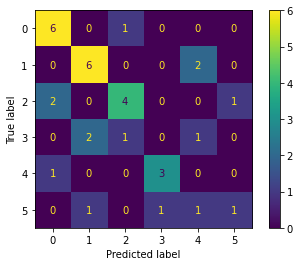

In [ ]:
cm_display.plot()
mtp.show()